# Dataset1: Temperature data for 2017
Objective: Calculate the average daily temperature

In [1]:
''' Get data and save as pandas dataframe'''
import pandas as pd
df = pd.read_csv('data/temperature_data_2017.txt')

In [2]:
df.head()

,station,valid,tmpc
0,LFAT,2017-01-01 00:00,-1.0
1,LFAT,2017-01-01 00:30,-2.0
2,LFAT,2017-01-01 01:00,-2.0
3,LFAT,2017-01-01 01:30,-2.0
4,LFAT,2017-01-01 02:00,-2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17169 entries, 0 to 17168
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  17169 non-null  object 
 1   valid    17169 non-null  object 
 2   tmpc     17169 non-null  float64
dtypes: float64(1), object(2)
memory usage: 402.5+ KB


In [4]:
df.describe()

,tmpc
count,17169.000000
mean,11.675403
std,6.030773
min,-6.000000
25%,8.000000
50%,12.000000
75%,16.000000
max,34.000000


In [5]:
df.isna().sum()

station    0
valid      0
tmpc       0
dtype: int64

In [6]:
''' Convert datatype to datetime '''
df['valid'] = pd.to_datetime(df['valid'])

In [7]:
''' Extract only dates from the data '''
df['Date'] = df['valid'].dt.date

In [8]:
df.head()

,station,valid,tmpc,Date
0,LFAT,2017-01-01 00:00:00,-1.0,2017-01-01
1,LFAT,2017-01-01 00:30:00,-2.0,2017-01-01
2,LFAT,2017-01-01 01:00:00,-2.0,2017-01-01
3,LFAT,2017-01-01 01:30:00,-2.0,2017-01-01
4,LFAT,2017-01-01 02:00:00,-2.0,2017-01-01


In [9]:
''' Convert datatype to datetime '''
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17169 entries, 0 to 17168
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  17169 non-null  object        
 1   valid    17169 non-null  datetime64[ns]
 2   tmpc     17169 non-null  float64       
 3   Date     17169 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 536.7+ KB


In [11]:
''' Check for suspicious values '''
df['tmpc'].unique() # The data seems good, no weird values

array([-1., -2., -3.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., -4.,
        9., 10., 11., 12., -5., -6., 13., 14., 15., 16., 17., 18., 19.,
       20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
       33., 34.])

In [12]:
''' Insert new columns for day and month '''
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df

,station,valid,tmpc,Date,month,day
0,LFAT,2017-01-01 00:00:00,-1.0,2017-01-01,1,1
1,LFAT,2017-01-01 00:30:00,-2.0,2017-01-01,1,1
2,LFAT,2017-01-01 01:00:00,-2.0,2017-01-01,1,1
3,LFAT,2017-01-01 01:30:00,-2.0,2017-01-01,1,1
4,LFAT,2017-01-01 02:00:00,-2.0,2017-01-01,1,1
...,...,...,...,...,...,...
17164,LFAT,2017-12-30 21:30:00,10.0,2017-12-30,12,30
17165,LFAT,2017-12-30 22:00:00,10.0,2017-12-30,12,30
17166,LFAT,2017-12-30 22:30:00,11.0,2017-12-30,12,30
17167,LFAT,2017-12-30 23:00:00,12.0,2017-12-30,12,30


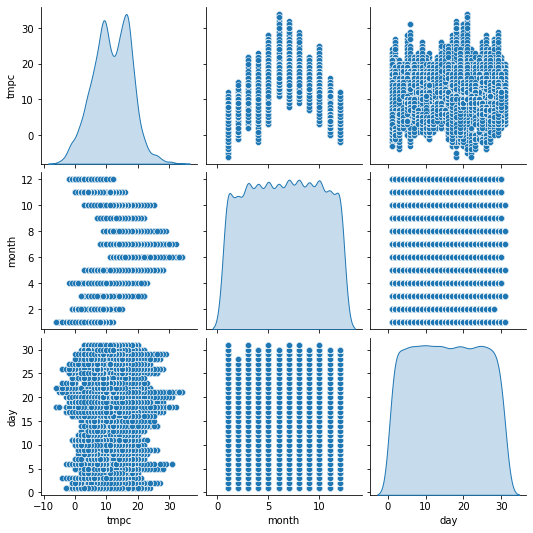

In [13]:
import seaborn as sns
sns.pairplot(data=df, diag_kind='kde')

In [14]:
''' Get the average daily temperature '''
df_avg_2017 = df.groupby([df['month'], df['day']]).mean()
df_avg_2017

tmpc
month day           
1     1     0.086957
      2     2.895833
      3     2.312500
      4     5.914894
      5     2.895833
...              ...
12    26    7.166667
      27    5.520833
      28    4.645833
      29    5.958333
      30   10.604167

[364 rows x 1 columns]

In [15]:
df_avg_2017.to_csv('Average_temp_2017.csv')

# Dataset 2: Temperature data for 2013-2016
Objective: Calculate the average daily temperature

In [16]:
''' Get data and save as pandas dataframe'''
df1 = pd.read_csv('data/temperature_data_past.txt')
df1.head()

,station,valid,tmpc
0,LFAT,2013-01-01 00:00,9.0
1,LFAT,2013-01-01 00:30,9.0
2,LFAT,2013-01-01 01:00,9.0
3,LFAT,2013-01-01 01:30,9.0
4,LFAT,2013-01-01 02:00,9.0


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68111 entries, 0 to 68110
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  68111 non-null  object 
 1   valid    68111 non-null  object 
 2   tmpc     68110 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


In [18]:
''' Convert datatype to datetime '''
df1['valid'] = pd.to_datetime(df1['valid'])

In [19]:
''' Get only the date from data'''
df1['Date'] = df1['valid'].dt.date

In [20]:
''' Convert datatype to datetime '''
df1['Date'] = pd.to_datetime(df1['Date'])

In [21]:
df1

,station,valid,tmpc,Date
0,LFAT,2013-01-01 00:00:00,9.0,2013-01-01
1,LFAT,2013-01-01 00:30:00,9.0,2013-01-01
2,LFAT,2013-01-01 01:00:00,9.0,2013-01-01
3,LFAT,2013-01-01 01:30:00,9.0,2013-01-01
4,LFAT,2013-01-01 02:00:00,9.0,2013-01-01
...,...,...,...,...
68106,LFAT,2016-12-30 21:30:00,2.0,2016-12-30
68107,LFAT,2016-12-30 22:00:00,2.0,2016-12-30
68108,LFAT,2016-12-30 22:30:00,2.0,2016-12-30
68109,LFAT,2016-12-30 23:00:00,1.0,2016-12-30


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68111 entries, 0 to 68110
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  68111 non-null  object        
 1   valid    68111 non-null  datetime64[ns]
 2   tmpc     68110 non-null  float64       
 3   Date     68111 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 2.1+ MB


In [23]:
df1.describe()

,tmpc
count,68110.000000
mean,11.228983
std,5.762650
min,-9.000000
25%,7.000000
50%,11.000000
75%,15.000000
max,35.000000


In [24]:
df1.isna().sum()

station    0
valid      0
tmpc       1
Date       0
dtype: int64

In [25]:
''' Check for suspicious values '''
df1['tmpc'].unique()

array([ 9., 10.,  8.,  7.,  6., 11.,  5.,  4.,  3.,  2.,  1.,  0., -1.,
       -2., -3., -4., -5., -6., -7., -8., -9., 12., 13., 14., 15., 16.,
       17., 19., 21., 23., 24., 25., 20., 18., 22., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., nan])

In [26]:
''' Insert seperate column for day and month '''
df1['month'] = df1['Date'].dt.month
df1['day'] = df1['Date'].dt.day
df1

,station,valid,tmpc,Date,month,day
0,LFAT,2013-01-01 00:00:00,9.0,2013-01-01,1,1
1,LFAT,2013-01-01 00:30:00,9.0,2013-01-01,1,1
2,LFAT,2013-01-01 01:00:00,9.0,2013-01-01,1,1
3,LFAT,2013-01-01 01:30:00,9.0,2013-01-01,1,1
4,LFAT,2013-01-01 02:00:00,9.0,2013-01-01,1,1
...,...,...,...,...,...,...
68106,LFAT,2016-12-30 21:30:00,2.0,2016-12-30,12,30
68107,LFAT,2016-12-30 22:00:00,2.0,2016-12-30,12,30
68108,LFAT,2016-12-30 22:30:00,2.0,2016-12-30,12,30
68109,LFAT,2016-12-30 23:00:00,1.0,2016-12-30,12,30


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68111 entries, 0 to 68110
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  68111 non-null  object        
 1   valid    68111 non-null  datetime64[ns]
 2   tmpc     68110 non-null  float64       
 3   Date     68111 non-null  datetime64[ns]
 4   month    68111 non-null  int64         
 5   day      68111 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 3.1+ MB


In [28]:
''' Get average daily temperature '''
df1_avg_past = df1.groupby([df1['month'], df1['day']]).mean()
df1_avg_past

tmpc
month day          
1     1    6.723958
      2    9.005208
      3    8.704545
      4    7.833333
      5    6.687500
...             ...
12    27   7.036458
      28   4.421875
      29   4.343915
      30   5.059140
      31   6.812500

[366 rows x 1 columns]

In [29]:
df1_avg_past.to_csv('Average_temp_past.csv')

# Calculate the temperature deviation between 2017 and past data

In [30]:
''' Get the average daily temperature of 2017 and past years in one dataframe '''
avgg = pd.merge(df1_avg_past, df_avg_2017, how = 'outer', on = ['month', 'day'])#, indicator = 'True')
avgg

tmpc_x     tmpc_y
month day                     
1     1    6.723958   0.086957
      2    9.005208   2.895833
      3    8.704545   2.312500
      4    7.833333   5.914894
      5    6.687500   2.895833
...             ...        ...
12    27   7.036458   5.520833
      28   4.421875   4.645833
      29   4.343915   5.958333
      30   5.059140  10.604167
      31   6.812500        NaN

[366 rows x 2 columns]

In [31]:
avgg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 366 entries, (1, 1) to (12, 31)
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc_x  366 non-null    float64
 1   tmpc_y  364 non-null    float64
dtypes: float64(2)
memory usage: 8.2 KB


In [32]:
''' Calculate the deviation by performing a subtraction '''
avgg['temp_deviation'] = avgg['tmpc_y'] - avgg['tmpc_x']
avgg

tmpc_x     tmpc_y  temp_deviation
month day                                     
1     1    6.723958   0.086957       -6.637002
      2    9.005208   2.895833       -6.109375
      3    8.704545   2.312500       -6.392045
      4    7.833333   5.914894       -1.918440
      5    6.687500   2.895833       -3.791667
...             ...        ...             ...
12    27   7.036458   5.520833       -1.515625
      28   4.421875   4.645833        0.223958
      29   4.343915   5.958333        1.614418
      30   5.059140  10.604167        5.545027
      31   6.812500        NaN             NaN

[366 rows x 3 columns]

In [33]:
''' Rename columns for clarity '''
avgg.rename(columns = {'tmpc_x':'tmpc_past', 'tmpc_y':'tmpc_2017'}, inplace = True)
avgg

tmpc_past  tmpc_2017  temp_deviation
month day                                      
1     1     6.723958   0.086957       -6.637002
      2     9.005208   2.895833       -6.109375
      3     8.704545   2.312500       -6.392045
      4     7.833333   5.914894       -1.918440
      5     6.687500   2.895833       -3.791667
...              ...        ...             ...
12    27    7.036458   5.520833       -1.515625
      28    4.421875   4.645833        0.223958
      29    4.343915   5.958333        1.614418
      30    5.059140  10.604167        5.545027
      31    6.812500        NaN             NaN

[366 rows x 3 columns]

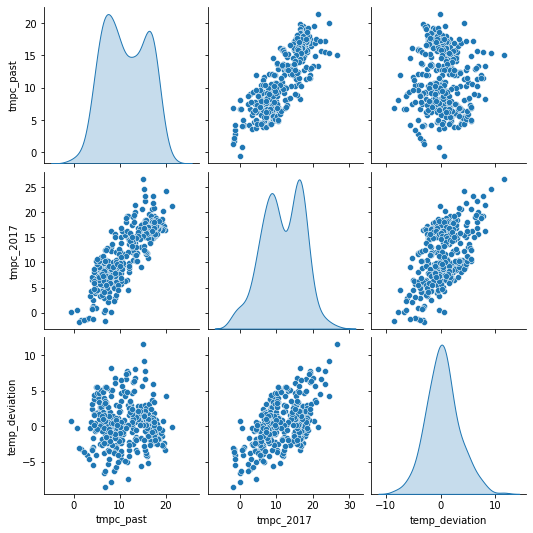

In [34]:
import seaborn as sns
sns.pairplot(data=avgg, diag_kind='kde')


In [35]:
avgg.to_csv('temperature_deviation.csv')

# Dataset 3: Electricity consumption deviation data from Office
Objective: Calculate the average daily consumption deviation

In [36]:
''' Consumption data as provided by the company '''
df2 = pd.read_csv('data/Consumption_deviation_2017.csv', sep = ';')
df2.head()

,timestamp (UTC),MW
0,01.01.2017 00:00,35
1,01.01.2017 00:30,-8
2,01.01.2017 01:00,31
3,01.01.2017 01:30,58
4,01.01.2017 02:00,-21


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17445 entries, 0 to 17444
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp (UTC)  17445 non-null  object
 1   MW               17445 non-null  object
dtypes: object(2)
memory usage: 272.7+ KB


In [38]:
''' Convert datatype to datetime '''
df2['timestamp (UTC)'] = pd.to_datetime(df2['timestamp (UTC)'])

In [39]:
''' Extract only date from data '''
df2['Date'] = df2['timestamp (UTC)'].dt.date

In [40]:
''' Convert datatype to datetime '''
df2['Date'] = pd.to_datetime(df2['Date'])

In [41]:
df2.head()

,timestamp (UTC),MW,Date
0,2017-01-01 00:00:00,35,2017-01-01
1,2017-01-01 00:30:00,-8,2017-01-01
2,2017-01-01 01:00:00,31,2017-01-01
3,2017-01-01 01:30:00,58,2017-01-01
4,2017-01-01 02:00:00,-21,2017-01-01


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17445 entries, 0 to 17444
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp (UTC)  17445 non-null  datetime64[ns]
 1   MW               17445 non-null  object        
 2   Date             17445 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 409.0+ KB


In [43]:
df2.isna().sum()

timestamp (UTC)    0
MW                 0
Date               0
dtype: int64

In [44]:
'''Check for suspicious values ''' 
df2['MW'].unique() # Two abnormal values: -1966610 and #WERT!

array(['35', '-8', '31', '58', '-21', '-85', '74', '-86', '-127', '-22',
       '-109', '55', '-74', '80', '-102', '60', '-23', '16', '20', '110',
       '71', '5', '87', '89', '-54', '-105', '4', '88', '-15', '97',
       '-126', '-65', '-37', '41', '-90', '108', '-73', '-9', '63', '94',
       '-128', '33', '28', '102', '2', '-52', '59', '78', '68', '98',
       '-24', '93', '-133', '-72', '19', '-53', '49', '18', '99', '-75',
       '61', '-25', '-12', '12', '-28', '-29', '84', '-35', '90', '-42',
       '-46', '85', '-16', '54', '-17', '-114', '-98', '-125', '-38',
       '-68', '-11', '-47', '32', '-117', '133', '-41', '-97', '6', '-30',
       '40', '37', '103', '112', '107', '127', '-89', '11', '132', '-81',
       '-39', '-63', '70', '111', '-79', '-31', '131', '81', '50', '119',
       '-122', '-76', '8', '9', '-45', '-132', '57', '-116', '14', '39',
       '76', '-66', '-7', '83', '-84', '30', '-121', '-1', '122', '129',
       '7', '21', '-13', '-20', '72', '-78', '-33', '-6

In [45]:
''' Convert both to NaN so the calculations are not affected '''
import numpy as np
df2['MW'] = df2['MW'].replace({'-1966610': np.nan})
df2['MW'] = df2['MW'].replace({'#WERT!': np.nan})

In [46]:
df2['MW'].unique() 

array(['35', '-8', '31', '58', '-21', '-85', '74', '-86', '-127', '-22',
       '-109', '55', '-74', '80', '-102', '60', '-23', '16', '20', '110',
       '71', '5', '87', '89', '-54', '-105', '4', '88', '-15', '97',
       '-126', '-65', '-37', '41', '-90', '108', '-73', '-9', '63', '94',
       '-128', '33', '28', '102', '2', '-52', '59', '78', '68', '98',
       '-24', '93', '-133', '-72', '19', '-53', '49', '18', '99', '-75',
       '61', '-25', '-12', '12', '-28', '-29', '84', '-35', '90', '-42',
       '-46', '85', '-16', '54', '-17', '-114', '-98', '-125', '-38',
       '-68', '-11', '-47', '32', '-117', '133', '-41', '-97', '6', '-30',
       '40', '37', '103', '112', '107', '127', '-89', '11', '132', '-81',
       '-39', '-63', '70', '111', '-79', '-31', '131', '81', '50', '119',
       '-122', '-76', '8', '9', '-45', '-132', '57', '-116', '14', '39',
       '76', '-66', '-7', '83', '-84', '30', '-121', '-1', '122', '129',
       '7', '21', '-13', '-20', '72', '-78', '-33', '-6

In [47]:
''' Convert datatype to int to be able to perform calculations '''
df2['MW'] = df2['MW'].astype('float')
df2['MW'] = df2['MW'].astype('Int64')

In [48]:
''' Extract day and month from the data '''
df2['month'] = df2['Date'].dt.month
df2['day'] = df2['Date'].dt.day
df2

,timestamp (UTC),MW,Date,month,day
0,2017-01-01 00:00:00,35,2017-01-01,1,1
1,2017-01-01 00:30:00,-8,2017-01-01,1,1
2,2017-01-01 01:00:00,31,2017-01-01,1,1
3,2017-01-01 01:30:00,58,2017-01-01,1,1
4,2017-01-01 02:00:00,-21,2017-01-01,1,1
...,...,...,...,...,...
17440,2017-12-30 22:00:00,-93,2017-12-30,12,30
17441,2017-12-30 22:30:00,-44,2017-12-30,12,30
17442,2017-12-30 23:00:00,-61,2017-12-30,12,30
17443,2017-12-30 23:30:00,122,2017-12-30,12,30


In [49]:
''' Get the average daily consumption deviation '''
df2_avg_consump = df2.groupby([df2['month'], df2['day']]).mean()
df2_avg_consump

MW
month day           
1     1       2.0625
      2    67.854167
      3   -29.041667
      4    24.704545
      5    21.729167
...              ...
12    27       -73.0
      28  -32.541667
      29    4.583333
      30  -29.958333
      31       -11.0

[365 rows x 1 columns]

In [50]:
df2_avg_consump.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 365 entries, (1, 1) to (12, 31)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MW      365 non-null    Float64
dtypes: Float64(1)
memory usage: 4.4 KB


In [51]:
''' Merge the table with average temperature (2017 and past), average temperature deviation and average consumption deiation'''
final = pd.merge(avgg, df2_avg_consump, how = 'outer', on = ['month', 'day'])
final

tmpc_past  tmpc_2017  temp_deviation         MW
month day                                                 
1     1     6.723958   0.086957       -6.637002     2.0625
      2     9.005208   2.895833       -6.109375  67.854167
      3     8.704545   2.312500       -6.392045 -29.041667
      4     7.833333   5.914894       -1.918440  24.704545
      5     6.687500   2.895833       -3.791667  21.729167
...              ...        ...             ...        ...
12    27    7.036458   5.520833       -1.515625      -73.0
      28    4.421875   4.645833        0.223958 -32.541667
      29    4.343915   5.958333        1.614418   4.583333
      30    5.059140  10.604167        5.545027 -29.958333
      31    6.812500        NaN             NaN      -11.0

[366 rows x 4 columns]

In [52]:
''' Data with temperature and consumption deviation '''
final.to_csv('deviation_data.csv')

In [53]:
final.info() # Remove null values 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 366 entries, (1, 1) to (12, 31)
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tmpc_past       366 non-null    float64
 1   tmpc_2017       364 non-null    float64
 2   temp_deviation  364 non-null    float64
 3   MW              365 non-null    Float64
dtypes: Float64(1), float64(3)
memory usage: 14.3 KB


In [54]:
''' Remove null values '''
final_without_NaN = final.dropna()
final_without_NaN

tmpc_past  tmpc_2017  temp_deviation         MW
month day                                                 
1     1     6.723958   0.086957       -6.637002     2.0625
      2     9.005208   2.895833       -6.109375  67.854167
      3     8.704545   2.312500       -6.392045 -29.041667
      4     7.833333   5.914894       -1.918440  24.704545
      5     6.687500   2.895833       -3.791667  21.729167
...              ...        ...             ...        ...
12    26    7.984211   7.166667       -0.817544 -36.104167
      27    7.036458   5.520833       -1.515625      -73.0
      28    4.421875   4.645833        0.223958 -32.541667
      29    4.343915   5.958333        1.614418   4.583333
      30    5.059140  10.604167        5.545027 -29.958333

[364 rows x 4 columns]

In [55]:
final_without_NaN.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 364 entries, (1, 1) to (12, 30)
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tmpc_past       364 non-null    float64
 1   tmpc_2017       364 non-null    float64
 2   temp_deviation  364 non-null    float64
 3   MW              364 non-null    Float64
dtypes: Float64(1), float64(3)
memory usage: 14.2 KB


# Summer and winter tables as suggested

In [56]:
data = pd.read_csv('deviation_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           366 non-null    int64  
 1   day             366 non-null    int64  
 2   tmpc_past       366 non-null    float64
 3   tmpc_2017       364 non-null    float64
 4   temp_deviation  364 non-null    float64
 5   MW              365 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 17.3 KB


In [57]:
data

,month,day,tmpc_past,tmpc_2017,temp_deviation,MW
0,1,1,6.723958,0.086957,-6.637002,2.062500
1,1,2,9.005208,2.895833,-6.109375,67.854167
2,1,3,8.704545,2.312500,-6.392045,-29.041667
3,1,4,7.833333,5.914894,-1.918440,24.704545
4,1,5,6.687500,2.895833,-3.791667,21.729167
...,...,...,...,...,...,...
361,12,27,7.036458,5.520833,-1.515625,-73.000000
362,12,28,4.421875,4.645833,0.223958,-32.541667
363,12,29,4.343915,5.958333,1.614418,4.583333
364,12,30,5.059140,10.604167,5.545027,-29.958333


In [58]:
''' Check for splitting the table into summer and winter '''
data.loc[274] # 91 (1st apr) 244 (1st Sept) 274 (1st Oct)  [91:273 = summer and 274:90 = winter]

month             10.000000
day                1.000000
tmpc_past         13.819876
tmpc_2017         15.437500
temp_deviation     1.617624
MW                -1.500000
Name: 274, dtype: float64

In [59]:
''' Splitting the summer table by indexing '''
summer_table = data[91:273]
summer_table

,month,day,tmpc_past,tmpc_2017,temp_deviation,MW
91,4,1,7.927083,9.875000,1.947917,-1.354167
92,4,2,8.812500,7.840909,-0.971591,4.666667
93,4,3,9.572917,7.866667,-1.706250,-3.104167
94,4,4,8.265625,8.234043,-0.031582,18.062500
95,4,5,7.536458,10.229167,2.692708,10.083333
...,...,...,...,...,...,...
268,9,25,15.228916,16.854167,1.625251,-13.041667
269,9,26,14.283133,16.041667,1.758534,9.979167
270,9,27,14.423611,16.604167,2.180556,14.354167
271,9,28,15.772414,15.895833,0.123420,-2.708333


In [60]:
''' Splitting the winetr table by indexing '''
winter1 = data[0:90]
winter1

,month,day,tmpc_past,tmpc_2017,temp_deviation,MW
0,1,1,6.723958,0.086957,-6.637002,2.062500
1,1,2,9.005208,2.895833,-6.109375,67.854167
2,1,3,8.704545,2.312500,-6.392045,-29.041667
3,1,4,7.833333,5.914894,-1.918440,24.704545
4,1,5,6.687500,2.895833,-3.791667,21.729167
...,...,...,...,...,...,...
85,3,26,5.958333,11.041667,5.083333,19.913043
86,3,27,6.401042,11.208333,4.807292,25.562500
87,3,28,7.417989,10.166667,2.748677,67.458333
88,3,29,8.182292,13.104167,4.921875,44.458333


In [61]:
''' Splitting the winetr table by indexing '''
winter2 = data[274:366]
winter2

,month,day,tmpc_past,tmpc_2017,temp_deviation,MW
274,10,1,13.819876,15.437500,1.617624,-1.500000
275,10,2,13.981250,16.085106,2.103856,13.916667
276,10,3,13.341772,13.854167,0.512395,38.833333
277,10,4,14.527397,14.687500,0.160103,44.291667
278,10,5,14.111888,15.166667,1.054779,8.250000
...,...,...,...,...,...,...
361,12,27,7.036458,5.520833,-1.515625,-73.000000
362,12,28,4.421875,4.645833,0.223958,-32.541667
363,12,29,4.343915,5.958333,1.614418,4.583333
364,12,30,5.059140,10.604167,5.545027,-29.958333


In [62]:
''' Merge the winetr table by concatenating '''
f = [winter1, winter2]
winter_table = pd.concat(f)
winter_table

,month,day,tmpc_past,tmpc_2017,temp_deviation,MW
0,1,1,6.723958,0.086957,-6.637002,2.062500
1,1,2,9.005208,2.895833,-6.109375,67.854167
2,1,3,8.704545,2.312500,-6.392045,-29.041667
3,1,4,7.833333,5.914894,-1.918440,24.704545
4,1,5,6.687500,2.895833,-3.791667,21.729167
...,...,...,...,...,...,...
361,12,27,7.036458,5.520833,-1.515625,-73.000000
362,12,28,4.421875,4.645833,0.223958,-32.541667
363,12,29,4.343915,5.958333,1.614418,4.583333
364,12,30,5.059140,10.604167,5.545027,-29.958333


# Probability for the whole year
Logistic Regression used for calculation of probabilities

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [64]:
final_without_NaN

tmpc_past  tmpc_2017  temp_deviation         MW
month day                                                 
1     1     6.723958   0.086957       -6.637002     2.0625
      2     9.005208   2.895833       -6.109375  67.854167
      3     8.704545   2.312500       -6.392045 -29.041667
      4     7.833333   5.914894       -1.918440  24.704545
      5     6.687500   2.895833       -3.791667  21.729167
...              ...        ...             ...        ...
12    26    7.984211   7.166667       -0.817544 -36.104167
      27    7.036458   5.520833       -1.515625      -73.0
      28    4.421875   4.645833        0.223958 -32.541667
      29    4.343915   5.958333        1.614418   4.583333
      30    5.059140  10.604167        5.545027 -29.958333

[364 rows x 4 columns]

# We need the target variables to be in binary form

In [65]:
final_without_NaN['y'] = np.where(final_without_NaN['MW'] > 0, 1, 0) 
final_without_NaN.head()

<ipython-input-65-0207a910222f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_without_NaN['y'] = np.where(final_without_NaN['MW'] > 0, 1, 0)


tmpc_past  tmpc_2017  temp_deviation         MW  y
month day                                                    
1     1     6.723958   0.086957       -6.637002     2.0625  1
      2     9.005208   2.895833       -6.109375  67.854167  1
      3     8.704545   2.312500       -6.392045 -29.041667  0
      4     7.833333   5.914894       -1.918440  24.704545  1
      5     6.687500   2.895833       -3.791667  21.729167  1

In [66]:
# predictor values
feature_cols = ['temp_deviation']
X = final_without_NaN[feature_cols]

# response variable
y = final_without_NaN['y']

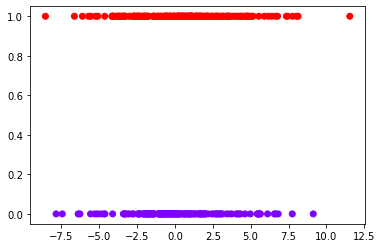

In [67]:
''' Plot of our variables '''
plt.scatter(X,y,c=y,cmap='rainbow')

In [68]:
''' Test train split '''
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 0)

In [69]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
''' GridSearchCV is a good way to find suitable parameters for Random Forest: max depth:2 and num_estmatprs:50 taken as suggested '''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc= RandomForestClassifier()
parameters= {
    'n_estimators':[5,10,50,100,250],
    'max_depth':[2,4,8,16,32,None]
}
cv = GridSearchCV(rfc, parameters,cv=5)
cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [71]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
display(cv)

Best parameters are: {'max_depth': 2, 'n_estimators': 100}


0.598 + or -0.05 for the {'max_depth': 2, 'n_estimators': 5}
0.591 + or -0.017 for the {'max_depth': 2, 'n_estimators': 10}
0.574 + or -0.033 for the {'max_depth': 2, 'n_estimators': 50}
0.601 + or -0.039 for the {'max_depth': 2, 'n_estimators': 100}
0.588 + or -0.036 for the {'max_depth': 2, 'n_estimators': 250}
0.564 + or -0.038 for the {'max_depth': 4, 'n_estimators': 5}
0.571 + or -0.038 for the {'max_depth': 4, 'n_estimators': 10}
0.56 + or -0.049 for the {'max_depth': 4, 'n_estimators': 50}
0.546 + or -0.039 for the {'max_depth': 4, 'n_estimators': 100}
0.55 + or -0.044 for the {'max_depth': 4, 'n_estimators': 250}
0.502 + or -0.072 for the {'max_depth': 8, 'n_estimators': 5}
0.495 + or -0.095 for the {'max_depth': 8, 'n_estimators': 10}
0.498 + or -0.058 for the {'max_depth': 8, 'n_estimators': 50}
0.474 + or -0.06 for the {'max_depth': 8, 'n_estimators': 100}
0.485 + or -0.076 for the {'max_depth': 8, 'n_estimators': 

In [72]:
model = RandomForestClassifier(n_estimators=50, max_depth = 2, random_state=0).fit(X_train_scaled, y_train)

In [73]:
y_pred_train = model.predict(X_train_scaled)
y_pred_train

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1])

In [74]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 63.57388316151202


In [75]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0])

In [76]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 61.64383561643836


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.30      0.42        33
           1       0.60      0.88      0.71        40

    accuracy                           0.62        73
   macro avg       0.64      0.59      0.57        73
weighted avg       0.63      0.62      0.58        73



Text(0.5, 33.0, 'Predicted Values')

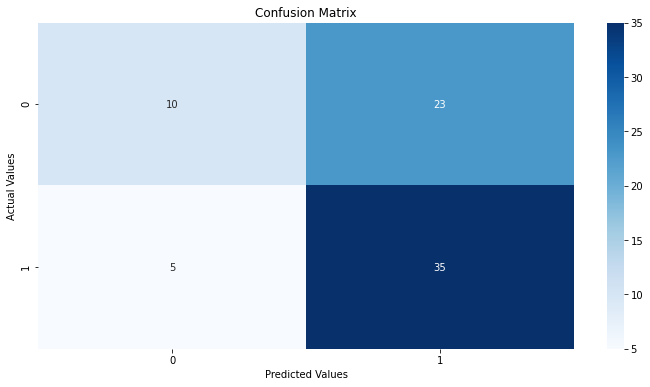

In [78]:
''' Confusion matrix for test dataset '''
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
#plt.savefig('confusion_matrix.png')

# Probability calculation

In [79]:
probability = model.predict_proba(X).round(4)
print(len(probability))
print(type(probability))
print(probability)

364
<class 'numpy.ndarray'>
[[0.4527 0.5473]
 [0.4527 0.5473]
 [0.4527 0.5473]
 [0.4477 0.5523]
 [0.4527 0.5473]
 [0.4527 0.5473]
 [0.4527 0.5473]
 [0.1627 0.8373]
 [0.1627 0.8373]
 [0.4315 0.5685]
 [0.3975 0.6025]
 [0.3674 0.6326]
 [0.4543 0.5457]
 [0.5396 0.4604]
 [0.4527 0.5473]
 [0.4527 0.5473]
 [0.4527 0.5473]
 [0.4527 0.5473]
 [0.4626 0.5374]
 [0.3674 0.6326]
 [0.4527 0.5473]
 [0.4527 0.5473]
 [0.4527 0.5473]
 [0.4527 0.5473]
 [0.4527 0.5473]
 [0.4527 0.5473]
 [0.4527 0.5473]
 [0.4626 0.5374]
 [0.4543 0.5457]
 [0.3505 0.6495]
 [0.486  0.514 ]
 [0.4225 0.5775]
 [0.3817 0.6183]
 [0.3817 0.6183]
 [0.2628 0.7372]
 [0.5396 0.4604]
 [0.364  0.636 ]
 [0.361  0.639 ]
 [0.4543 0.5457]
 [0.4543 0.5457]
 [0.4527 0.5473]
 [0.4527 0.5473]
 [0.486  0.514 ]
 [0.3833 0.6167]
 [0.4225 0.5775]
 [0.3975 0.6025]
 [0.3677 0.6323]
 [0.3975 0.6025]
 [0.3674 0.6326]
 [0.4225 0.5775]
 [0.4125 0.5875]
 [0.3817 0.6183]
 [0.3817 0.6183]
 [0.3817 0.6183]
 [0.357  0.643 ]
 [0.3748 0.6252]
 [0.3817 0.6183]
 [0

In [80]:
deficit = model.predict_proba(X)[:,1].round(3)

In [81]:
surplus = model.predict_proba(X)[:,0].round(3)

In [82]:
final_without_NaN['probability'] = probability.tolist()
final_without_NaN

<ipython-input-82-7192b744a900>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_without_NaN['probability'] = probability.tolist()


tmpc_past  tmpc_2017  temp_deviation         MW  y  \
month day                                                       
1     1     6.723958   0.086957       -6.637002     2.0625  1   
      2     9.005208   2.895833       -6.109375  67.854167  1   
      3     8.704545   2.312500       -6.392045 -29.041667  0   
      4     7.833333   5.914894       -1.918440  24.704545  1   
      5     6.687500   2.895833       -3.791667  21.729167  1   
...              ...        ...             ...        ... ..   
12    26    7.984211   7.166667       -0.817544 -36.104167  0   
      27    7.036458   5.520833       -1.515625      -73.0  0   
      28    4.421875   4.645833        0.223958 -32.541667  0   
      29    4.343915   5.958333        1.614418   4.583333  1   
      30    5.059140  10.604167        5.545027 -29.958333  0   

                probability  
month day                    
1     1    [0.4527, 0.5473]  
      2    [0.4527, 0.5473]  
      3    [0.4527, 0.5473]  
      4    [0.4477, 0.5523]  
      5    [0.4527, 0.5473]  
...                     ...  
12    26   [0.5321, 0.4679]  
      27   [0.1627, 0.8373]  
      28     [0.361, 0.639]  
      29   [0.4125, 0.5875]  
      30   [0.3817, 0.6183]  

[364 rows x 6 columns]

In [83]:
final_without_NaN.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 364 entries, (1, 1) to (12, 30)
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tmpc_past       364 non-null    float64
 1   tmpc_2017       364 non-null    float64
 2   temp_deviation  364 non-null    float64
 3   MW              364 non-null    Float64
 4   y               364 non-null    int32  
 5   probability     364 non-null    object 
dtypes: Float64(1), float64(3), int32(1), object(1)
memory usage: 18.5+ KB


In [84]:
final_without_NaN['surplus_probability'] = surplus.tolist()
final_without_NaN

<ipython-input-84-662f8067dfb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_without_NaN['surplus_probability'] = surplus.tolist()


tmpc_past  tmpc_2017  temp_deviation         MW  y  \
month day                                                       
1     1     6.723958   0.086957       -6.637002     2.0625  1   
      2     9.005208   2.895833       -6.109375  67.854167  1   
      3     8.704545   2.312500       -6.392045 -29.041667  0   
      4     7.833333   5.914894       -1.918440  24.704545  1   
      5     6.687500   2.895833       -3.791667  21.729167  1   
...              ...        ...             ...        ... ..   
12    26    7.984211   7.166667       -0.817544 -36.104167  0   
      27    7.036458   5.520833       -1.515625      -73.0  0   
      28    4.421875   4.645833        0.223958 -32.541667  0   
      29    4.343915   5.958333        1.614418   4.583333  1   
      30    5.059140  10.604167        5.545027 -29.958333  0   

                probability  surplus_probability  
month day                                         
1     1    [0.4527, 0.5473]                0.453  
      2    [0.4527, 0.5473]                0.453  
      3    [0.4527, 0.5473]                0.453  
      4    [0.4477, 0.5523]                0.448  
      5    [0.4527, 0.5473]                0.453  
...                     ...                  ...  
12    26   [0.5321, 0.4679]                0.532  
      27   [0.1627, 0.8373]                0.163  
      28     [0.361, 0.639]                0.361  
      29   [0.4125, 0.5875]                0.412  
      30   [0.3817, 0.6183]                0.382  

[364 rows x 7 columns]

In [85]:
final_without_NaN['deficit_probability'] = deficit.tolist()
final_without_NaN

<ipython-input-85-2cbf724ccb29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_without_NaN['deficit_probability'] = deficit.tolist()


tmpc_past  tmpc_2017  temp_deviation         MW  y  \
month day                                                       
1     1     6.723958   0.086957       -6.637002     2.0625  1   
      2     9.005208   2.895833       -6.109375  67.854167  1   
      3     8.704545   2.312500       -6.392045 -29.041667  0   
      4     7.833333   5.914894       -1.918440  24.704545  1   
      5     6.687500   2.895833       -3.791667  21.729167  1   
...              ...        ...             ...        ... ..   
12    26    7.984211   7.166667       -0.817544 -36.104167  0   
      27    7.036458   5.520833       -1.515625      -73.0  0   
      28    4.421875   4.645833        0.223958 -32.541667  0   
      29    4.343915   5.958333        1.614418   4.583333  1   
      30    5.059140  10.604167        5.545027 -29.958333  0   

                probability  surplus_probability  deficit_probability  
month day                                                              
1     1    [0.4527, 0.5473]                0.453                0.547  
      2    [0.4527, 0.5473]                0.453                0.547  
      3    [0.4527, 0.5473]                0.453                0.547  
      4    [0.4477, 0.5523]                0.448                0.552  
      5    [0.4527, 0.5473]                0.453                0.547  
...                     ...                  ...                  ...  
12    26   [0.5321, 0.4679]                0.532                0.468  
      27   [0.1627, 0.8373]                0.163                0.837  
      28     [0.361, 0.639]                0.361                0.639  
      29   [0.4125, 0.5875]                0.412                0.588  
      30   [0.3817, 0.6183]                0.382                0.618  

[364 rows x 8 columns]

In [86]:
final_without_NaN['result'] = np.where(final_without_NaN['surplus_probability'] > final_without_NaN['deficit_probability'], 'Surplus', 'Deficit')
final_without_NaN

<ipython-input-86-4f7580230777>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_without_NaN['result'] = np.where(final_without_NaN['surplus_probability'] > final_without_NaN['deficit_probability'], 'Surplus', 'Deficit')


tmpc_past  tmpc_2017  temp_deviation         MW  y  \
month day                                                       
1     1     6.723958   0.086957       -6.637002     2.0625  1   
      2     9.005208   2.895833       -6.109375  67.854167  1   
      3     8.704545   2.312500       -6.392045 -29.041667  0   
      4     7.833333   5.914894       -1.918440  24.704545  1   
      5     6.687500   2.895833       -3.791667  21.729167  1   
...              ...        ...             ...        ... ..   
12    26    7.984211   7.166667       -0.817544 -36.104167  0   
      27    7.036458   5.520833       -1.515625      -73.0  0   
      28    4.421875   4.645833        0.223958 -32.541667  0   
      29    4.343915   5.958333        1.614418   4.583333  1   
      30    5.059140  10.604167        5.545027 -29.958333  0   

                probability  surplus_probability  deficit_probability   result  
month day                                                                       
1     1    [0.4527, 0.5473]                0.453                0.547  Deficit  
      2    [0.4527, 0.5473]                0.453                0.547  Deficit  
      3    [0.4527, 0.5473]                0.453                0.547  Deficit  
      4    [0.4477, 0.5523]                0.448                0.552  Deficit  
      5    [0.4527, 0.5473]                0.453                0.547  Deficit  
...                     ...                  ...                  ...      ...  
12    26   [0.5321, 0.4679]                0.532                0.468  Surplus  
      27   [0.1627, 0.8373]                0.163                0.837  Deficit  
      28     [0.361, 0.639]                0.361                0.639  Deficit  
      29   [0.4125, 0.5875]                0.412                0.588  Deficit  
      30   [0.3817, 0.6183]                0.382                0.618  Deficit  

[364 rows x 9 columns]

In [87]:
#frame['HighScore'] = frame[['test1','test2','test3']].max(axis=1)
final_without_NaN['final_probability'] = final_without_NaN[['surplus_probability', 'deficit_probability']].max(axis=1)
final_without_NaN

<ipython-input-87-19e9ff72d847>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_without_NaN['final_probability'] = final_without_NaN[['surplus_probability', 'deficit_probability']].max(axis=1)


tmpc_past  tmpc_2017  temp_deviation         MW  y  \
month day                                                       
1     1     6.723958   0.086957       -6.637002     2.0625  1   
      2     9.005208   2.895833       -6.109375  67.854167  1   
      3     8.704545   2.312500       -6.392045 -29.041667  0   
      4     7.833333   5.914894       -1.918440  24.704545  1   
      5     6.687500   2.895833       -3.791667  21.729167  1   
...              ...        ...             ...        ... ..   
12    26    7.984211   7.166667       -0.817544 -36.104167  0   
      27    7.036458   5.520833       -1.515625      -73.0  0   
      28    4.421875   4.645833        0.223958 -32.541667  0   
      29    4.343915   5.958333        1.614418   4.583333  1   
      30    5.059140  10.604167        5.545027 -29.958333  0   

                probability  surplus_probability  deficit_probability  \
month day                                                               
1     1    [0.4527, 0.5473]                0.453                0.547   
      2    [0.4527, 0.5473]                0.453                0.547   
      3    [0.4527, 0.5473]                0.453                0.547   
      4    [0.4477, 0.5523]                0.448                0.552   
      5    [0.4527, 0.5473]                0.453                0.547   
...                     ...                  ...                  ...   
12    26   [0.5321, 0.4679]                0.532                0.468   
      27   [0.1627, 0.8373]                0.163                0.837   
      28     [0.361, 0.639]                0.361                0.639   
      29   [0.4125, 0.5875]                0.412                0.588   
      30   [0.3817, 0.6183]                0.382                0.618   

            result  final_probability  
month day                              
1     1    Deficit              0.547  
      2    Deficit              0.547  
      3    Deficit              0.547  
      4    Deficit              0.552  
      5    Deficit              0.547  
...            ...                ...  
12    26   Surplus              0.532  
      27   Deficit              0.837  
      28   Deficit              0.639  
      29   Deficit              0.588  
      30   Deficit              0.618  

[364 rows x 10 columns]

In [88]:
final_without_NaN.to_csv('Probability.csv')

In [89]:
data = pd.read_csv('Probability.csv')
data

''' Change to month name '''
import calendar
data['Month'] = data['month'].apply(lambda x: calendar.month_abbr[x])
data

,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,y,probability,surplus_probability,deficit_probability,result,final_probability,Month
0,1,1,6.723958,0.086957,-6.637002,2.062500,1,"[0.4527, 0.5473]",0.453,0.547,Deficit,0.547,Jan
1,1,2,9.005208,2.895833,-6.109375,67.854167,1,"[0.4527, 0.5473]",0.453,0.547,Deficit,0.547,Jan
2,1,3,8.704545,2.312500,-6.392045,-29.041667,0,"[0.4527, 0.5473]",0.453,0.547,Deficit,0.547,Jan
3,1,4,7.833333,5.914894,-1.918440,24.704545,1,"[0.4477, 0.5523]",0.448,0.552,Deficit,0.552,Jan
4,1,5,6.687500,2.895833,-3.791667,21.729167,1,"[0.4527, 0.5473]",0.453,0.547,Deficit,0.547,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,12,26,7.984211,7.166667,-0.817544,-36.104167,0,"[0.5321, 0.4679]",0.532,0.468,Surplus,0.532,Dec
360,12,27,7.036458,5.520833,-1.515625,-73.000000,0,"[0.1627, 0.8373]",0.163,0.837,Deficit,0.837,Dec
361,12,28,4.421875,4.645833,0.223958,-32.541667,0,"[0.361, 0.639]",0.361,0.639,Deficit,0.639,Dec
362,12,29,4.343915,5.958333,1.614418,4.583333,1,"[0.4125, 0.5875]",0.412,0.588,Deficit,0.588,Dec


In [90]:
data.to_csv('temp_con_deviation_data.csv')

In [91]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [92]:
model.score(X,y)#.astype('int'))

0.5851648351648352

In [93]:
confusion_matrix(y, model.predict(X)) #.astype('int')

array([[ 13, 137],
       [ 14, 200]], dtype=int64)

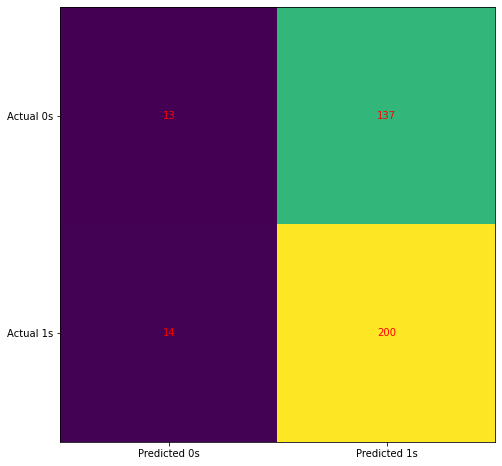

In [94]:
''' Confusion matrix for train dataset '''
cm = confusion_matrix(y.astype('int'), model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Probability for summer and winter seperately

# Summer

In [95]:
summer_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 91 to 272
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           182 non-null    int64  
 1   day             182 non-null    int64  
 2   tmpc_past       182 non-null    float64
 3   tmpc_2017       182 non-null    float64
 4   temp_deviation  182 non-null    float64
 5   MW              182 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 8.7 KB


In [96]:
summer_table['S/D category'] = np.where(summer_table['MW'] > 0, 1, 0) 
summer_table.head()

<ipython-input-96-231850fd6202>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_table['S/D category'] = np.where(summer_table['MW'] > 0, 1, 0)


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,S/D category
91,4,1,7.927083,9.875000,1.947917,-1.354167,0
92,4,2,8.812500,7.840909,-0.971591,4.666667,1
93,4,3,9.572917,7.866667,-1.706250,-3.104167,0
94,4,4,8.265625,8.234043,-0.031582,18.062500,1
95,4,5,7.536458,10.229167,2.692708,10.083333,1


In [97]:
''' Change to month name '''
import calendar
summer_table['Month'] = summer_table['month'].apply(lambda x: calendar.month_abbr[x])
summer_table

<ipython-input-97-11b7892bac0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_table['Month'] = summer_table['month'].apply(lambda x: calendar.month_abbr[x])


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,S/D category,Month
91,4,1,7.927083,9.875000,1.947917,-1.354167,0,Apr
92,4,2,8.812500,7.840909,-0.971591,4.666667,1,Apr
93,4,3,9.572917,7.866667,-1.706250,-3.104167,0,Apr
94,4,4,8.265625,8.234043,-0.031582,18.062500,1,Apr
95,4,5,7.536458,10.229167,2.692708,10.083333,1,Apr
...,...,...,...,...,...,...,...,...
268,9,25,15.228916,16.854167,1.625251,-13.041667,0,Sep
269,9,26,14.283133,16.041667,1.758534,9.979167,1,Sep
270,9,27,14.423611,16.604167,2.180556,14.354167,1,Sep
271,9,28,15.772414,15.895833,0.123420,-2.708333,0,Sep


In [98]:
# predictor values
feature_cols = ['temp_deviation']
X = summer_table[feature_cols]

# response variable
y = summer_table['S/D category']

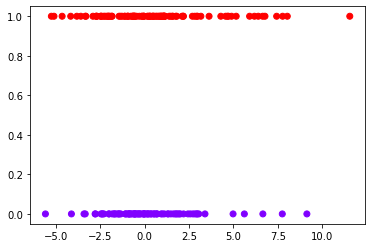

In [99]:
plt.scatter(X,y,c=y,cmap='rainbow')

In [100]:
''' Test train split '''
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 42)

In [101]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [102]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train_scaled, y_train)

In [103]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 55.86206896551724


In [104]:
y_pred = model.predict(X_test)

In [105]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 54.054054054054056


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.54      1.00      0.70        20

    accuracy                           0.54        37
   macro avg       0.27      0.50      0.35        37
weighted avg       0.29      0.54      0.38        37



C:\Users\kriti\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kriti\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kriti\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 33.0, 'Predicted Values')

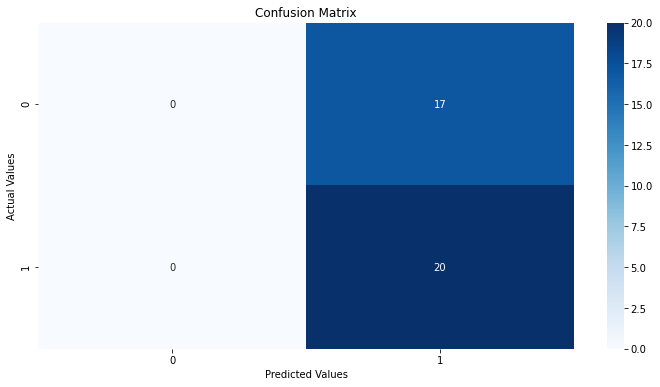

In [107]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
#plt.savefig('confusion_matrix.png')

In [108]:
probability = model.predict_proba(X).round(4)
print(len(probability))
print(type(probability))
print(probability)

182
<class 'numpy.ndarray'>
[[0.426  0.574 ]
 [0.4515 0.5485]
 [0.4579 0.5421]
 [0.4432 0.5568]
 [0.4195 0.5805]
 [0.4337 0.5663]
 [0.4406 0.5594]
 [0.43   0.57  ]
 [0.3984 0.6016]
 [0.4334 0.5666]
 [0.4484 0.5516]
 [0.4369 0.5631]
 [0.4416 0.5584]
 [0.4625 0.5375]
 [0.4384 0.5616]
 [0.4443 0.5557]
 [0.4528 0.5472]
 [0.4668 0.5332]
 [0.4685 0.5315]
 [0.4838 0.5162]
 [0.4527 0.5473]
 [0.4438 0.5562]
 [0.4511 0.5489]
 [0.4468 0.5532]
 [0.4879 0.5121]
 [0.4729 0.5271]
 [0.4523 0.5477]
 [0.4397 0.5603]
 [0.4386 0.5614]
 [0.4174 0.5826]
 [0.4451 0.5549]
 [0.4476 0.5524]
 [0.4497 0.5503]
 [0.4357 0.5643]
 [0.4645 0.5355]
 [0.4498 0.5502]
 [0.4723 0.5277]
 [0.4921 0.5079]
 [0.4745 0.5255]
 [0.4561 0.5439]
 [0.4383 0.5617]
 [0.4164 0.5836]
 [0.4292 0.5708]
 [0.4239 0.5761]
 [0.4022 0.5978]
 [0.3858 0.6142]
 [0.3764 0.6236]
 [0.4344 0.5656]
 [0.459  0.541 ]
 [0.4455 0.5545]
 [0.4271 0.5729]
 [0.4026 0.5974]
 [0.4171 0.5829]
 [0.3999 0.6001]
 [0.3792 0.6208]
 [0.3742 0.6258]
 [0.4184 0.5816]
 [0

In [109]:
deficit = model.predict_proba(X)[:,1].round(3)
#deficit

In [110]:
surplus = model.predict_proba(X)[:,0].round(3)
#surplus 

In [111]:
summer_table['probability'] = probability.tolist()
summer_table

<ipython-input-111-9cd62e628194>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_table['probability'] = probability.tolist()


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,S/D category,Month,probability
91,4,1,7.927083,9.875000,1.947917,-1.354167,0,Apr,"[0.426, 0.574]"
92,4,2,8.812500,7.840909,-0.971591,4.666667,1,Apr,"[0.4515, 0.5485]"
93,4,3,9.572917,7.866667,-1.706250,-3.104167,0,Apr,"[0.4579, 0.5421]"
94,4,4,8.265625,8.234043,-0.031582,18.062500,1,Apr,"[0.4432, 0.5568]"
95,4,5,7.536458,10.229167,2.692708,10.083333,1,Apr,"[0.4195, 0.5805]"
...,...,...,...,...,...,...,...,...,...
268,9,25,15.228916,16.854167,1.625251,-13.041667,0,Sep,"[0.4288, 0.5712]"
269,9,26,14.283133,16.041667,1.758534,9.979167,1,Sep,"[0.4276, 0.5724]"
270,9,27,14.423611,16.604167,2.180556,14.354167,1,Sep,"[0.424, 0.576]"
271,9,28,15.772414,15.895833,0.123420,-2.708333,0,Sep,"[0.4419, 0.5581]"


In [112]:
summer_table['surplus_probability'] = surplus.tolist()
summer_table

<ipython-input-112-2f669ffd47fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_table['surplus_probability'] = surplus.tolist()


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,S/D category,Month,probability,surplus_probability
91,4,1,7.927083,9.875000,1.947917,-1.354167,0,Apr,"[0.426, 0.574]",0.426
92,4,2,8.812500,7.840909,-0.971591,4.666667,1,Apr,"[0.4515, 0.5485]",0.451
93,4,3,9.572917,7.866667,-1.706250,-3.104167,0,Apr,"[0.4579, 0.5421]",0.458
94,4,4,8.265625,8.234043,-0.031582,18.062500,1,Apr,"[0.4432, 0.5568]",0.443
95,4,5,7.536458,10.229167,2.692708,10.083333,1,Apr,"[0.4195, 0.5805]",0.420
...,...,...,...,...,...,...,...,...,...,...
268,9,25,15.228916,16.854167,1.625251,-13.041667,0,Sep,"[0.4288, 0.5712]",0.429
269,9,26,14.283133,16.041667,1.758534,9.979167,1,Sep,"[0.4276, 0.5724]",0.428
270,9,27,14.423611,16.604167,2.180556,14.354167,1,Sep,"[0.424, 0.576]",0.424
271,9,28,15.772414,15.895833,0.123420,-2.708333,0,Sep,"[0.4419, 0.5581]",0.442


In [113]:
summer_table['deficit_probability'] = deficit.tolist()
summer_table

<ipython-input-113-b1c3825b78f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_table['deficit_probability'] = deficit.tolist()


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,S/D category,Month,probability,surplus_probability,deficit_probability
91,4,1,7.927083,9.875000,1.947917,-1.354167,0,Apr,"[0.426, 0.574]",0.426,0.574
92,4,2,8.812500,7.840909,-0.971591,4.666667,1,Apr,"[0.4515, 0.5485]",0.451,0.549
93,4,3,9.572917,7.866667,-1.706250,-3.104167,0,Apr,"[0.4579, 0.5421]",0.458,0.542
94,4,4,8.265625,8.234043,-0.031582,18.062500,1,Apr,"[0.4432, 0.5568]",0.443,0.557
95,4,5,7.536458,10.229167,2.692708,10.083333,1,Apr,"[0.4195, 0.5805]",0.420,0.580
...,...,...,...,...,...,...,...,...,...,...,...
268,9,25,15.228916,16.854167,1.625251,-13.041667,0,Sep,"[0.4288, 0.5712]",0.429,0.571
269,9,26,14.283133,16.041667,1.758534,9.979167,1,Sep,"[0.4276, 0.5724]",0.428,0.572
270,9,27,14.423611,16.604167,2.180556,14.354167,1,Sep,"[0.424, 0.576]",0.424,0.576
271,9,28,15.772414,15.895833,0.123420,-2.708333,0,Sep,"[0.4419, 0.5581]",0.442,0.558


In [114]:
summer_table['result'] = np.where(summer_table['surplus_probability'] > summer_table['deficit_probability'], 'Surplus', 'Deficit')
summer_table

<ipython-input-114-b0b15cf13640>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_table['result'] = np.where(summer_table['surplus_probability'] > summer_table['deficit_probability'], 'Surplus', 'Deficit')


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,S/D category,Month,probability,surplus_probability,deficit_probability,result
91,4,1,7.927083,9.875000,1.947917,-1.354167,0,Apr,"[0.426, 0.574]",0.426,0.574,Deficit
92,4,2,8.812500,7.840909,-0.971591,4.666667,1,Apr,"[0.4515, 0.5485]",0.451,0.549,Deficit
93,4,3,9.572917,7.866667,-1.706250,-3.104167,0,Apr,"[0.4579, 0.5421]",0.458,0.542,Deficit
94,4,4,8.265625,8.234043,-0.031582,18.062500,1,Apr,"[0.4432, 0.5568]",0.443,0.557,Deficit
95,4,5,7.536458,10.229167,2.692708,10.083333,1,Apr,"[0.4195, 0.5805]",0.420,0.580,Deficit
...,...,...,...,...,...,...,...,...,...,...,...,...
268,9,25,15.228916,16.854167,1.625251,-13.041667,0,Sep,"[0.4288, 0.5712]",0.429,0.571,Deficit
269,9,26,14.283133,16.041667,1.758534,9.979167,1,Sep,"[0.4276, 0.5724]",0.428,0.572,Deficit
270,9,27,14.423611,16.604167,2.180556,14.354167,1,Sep,"[0.424, 0.576]",0.424,0.576,Deficit
271,9,28,15.772414,15.895833,0.123420,-2.708333,0,Sep,"[0.4419, 0.5581]",0.442,0.558,Deficit


In [115]:
summer_table['final_probability'] = summer_table[['surplus_probability', 'deficit_probability']].max(axis=1)
summer_table

<ipython-input-115-9a74f8c1e370>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_table['final_probability'] = summer_table[['surplus_probability', 'deficit_probability']].max(axis=1)


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,S/D category,Month,probability,surplus_probability,deficit_probability,result,final_probability
91,4,1,7.927083,9.875000,1.947917,-1.354167,0,Apr,"[0.426, 0.574]",0.426,0.574,Deficit,0.574
92,4,2,8.812500,7.840909,-0.971591,4.666667,1,Apr,"[0.4515, 0.5485]",0.451,0.549,Deficit,0.549
93,4,3,9.572917,7.866667,-1.706250,-3.104167,0,Apr,"[0.4579, 0.5421]",0.458,0.542,Deficit,0.542
94,4,4,8.265625,8.234043,-0.031582,18.062500,1,Apr,"[0.4432, 0.5568]",0.443,0.557,Deficit,0.557
95,4,5,7.536458,10.229167,2.692708,10.083333,1,Apr,"[0.4195, 0.5805]",0.420,0.580,Deficit,0.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,9,25,15.228916,16.854167,1.625251,-13.041667,0,Sep,"[0.4288, 0.5712]",0.429,0.571,Deficit,0.571
269,9,26,14.283133,16.041667,1.758534,9.979167,1,Sep,"[0.4276, 0.5724]",0.428,0.572,Deficit,0.572
270,9,27,14.423611,16.604167,2.180556,14.354167,1,Sep,"[0.424, 0.576]",0.424,0.576,Deficit,0.576
271,9,28,15.772414,15.895833,0.123420,-2.708333,0,Sep,"[0.4419, 0.5581]",0.442,0.558,Deficit,0.558


In [116]:
summer_table.to_csv('Probability_summer.csv')

In [117]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [118]:
model.score(X,y)#.astype('int'))

0.554945054945055

In [119]:
confusion_matrix(y, model.predict(X)) #.astype('int')

array([[  0,  81],
       [  0, 101]], dtype=int64)

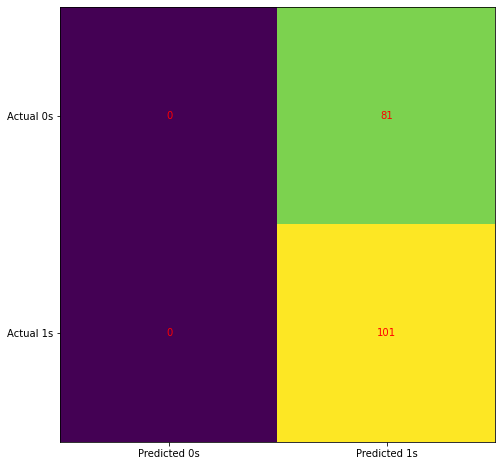

In [120]:
cm = confusion_matrix(y.astype('int'), model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Winter

In [121]:
winter_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 365
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           182 non-null    int64  
 1   day             182 non-null    int64  
 2   tmpc_past       182 non-null    float64
 3   tmpc_2017       180 non-null    float64
 4   temp_deviation  180 non-null    float64
 5   MW              181 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 10.0 KB


In [122]:
winter_table = winter_table.dropna()
winter_table

,month,day,tmpc_past,tmpc_2017,temp_deviation,MW
0,1,1,6.723958,0.086957,-6.637002,2.062500
1,1,2,9.005208,2.895833,-6.109375,67.854167
2,1,3,8.704545,2.312500,-6.392045,-29.041667
3,1,4,7.833333,5.914894,-1.918440,24.704545
4,1,5,6.687500,2.895833,-3.791667,21.729167
...,...,...,...,...,...,...
360,12,26,7.984211,7.166667,-0.817544,-36.104167
361,12,27,7.036458,5.520833,-1.515625,-73.000000
362,12,28,4.421875,4.645833,0.223958,-32.541667
363,12,29,4.343915,5.958333,1.614418,4.583333


In [123]:
''' Change to month name '''
import calendar
winter_table['Month'] = winter_table['month'].apply(lambda x: calendar.month_abbr[x])
winter_table

<ipython-input-123-7fd493236d2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_table['Month'] = winter_table['month'].apply(lambda x: calendar.month_abbr[x])


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,Month
0,1,1,6.723958,0.086957,-6.637002,2.062500,Jan
1,1,2,9.005208,2.895833,-6.109375,67.854167,Jan
2,1,3,8.704545,2.312500,-6.392045,-29.041667,Jan
3,1,4,7.833333,5.914894,-1.918440,24.704545,Jan
4,1,5,6.687500,2.895833,-3.791667,21.729167,Jan
...,...,...,...,...,...,...,...
360,12,26,7.984211,7.166667,-0.817544,-36.104167,Dec
361,12,27,7.036458,5.520833,-1.515625,-73.000000,Dec
362,12,28,4.421875,4.645833,0.223958,-32.541667,Dec
363,12,29,4.343915,5.958333,1.614418,4.583333,Dec


In [124]:
winter_table['S/D category'] = np.where(winter_table['MW'] > 0, 1, 0) 
winter_table.head()

<ipython-input-124-51dc026aabcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_table['S/D category'] = np.where(winter_table['MW'] > 0, 1, 0)


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,Month,S/D category
0,1,1,6.723958,0.086957,-6.637002,2.062500,Jan,1
1,1,2,9.005208,2.895833,-6.109375,67.854167,Jan,1
2,1,3,8.704545,2.312500,-6.392045,-29.041667,Jan,0
3,1,4,7.833333,5.914894,-1.918440,24.704545,Jan,1
4,1,5,6.687500,2.895833,-3.791667,21.729167,Jan,1


In [125]:
# predictor values
feature_cols = ['temp_deviation']
X = winter_table[feature_cols]

# response variable
y = winter_table['S/D category']

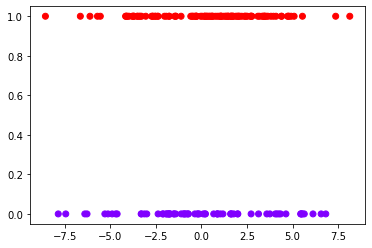

In [126]:
plt.scatter(X,y,c=y,cmap='rainbow')

In [127]:
''' Test train split '''
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 42)

In [128]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [129]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train_scaled, y_train)

In [130]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 62.5


In [131]:
y_pred = model.predict(X_test)

In [132]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 61.111111111111114


In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.07      0.12        15
           1       0.60      1.00      0.75        21

    accuracy                           0.61        36
   macro avg       0.80      0.53      0.44        36
weighted avg       0.77      0.61      0.49        36



Text(0.5, 33.0, 'Predicted Values')

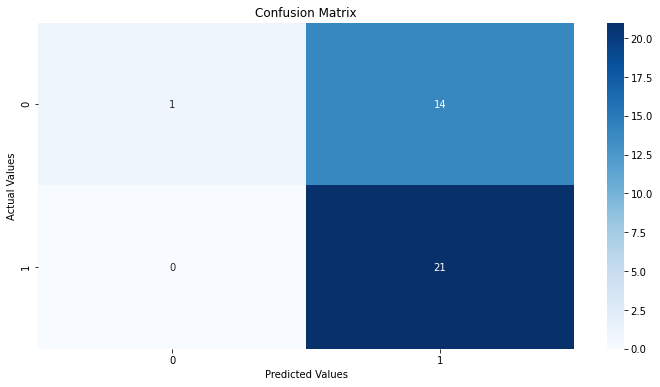

In [134]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
#plt.savefig('confusion_matrix.png')

In [135]:
probability = model.predict_proba(X).round(4)
print(len(probability))
print(type(probability))
print(probability)

180
<class 'numpy.ndarray'>
[[0.5149 0.4851]
 [0.5038 0.4962]
 [0.5098 0.4902]
 [0.4168 0.5832]
 [0.4554 0.5446]
 [0.5402 0.4598]
 [0.4452 0.5548]
 [0.4064 0.5936]
 [0.4065 0.5935]
 [0.3791 0.6209]
 [0.3187 0.6813]
 [0.3612 0.6388]
 [0.4139 0.5861]
 [0.3928 0.6072]
 [0.4295 0.5705]
 [0.4388 0.5612]
 [0.4617 0.5383]
 [0.4448 0.5552]
 [0.3825 0.6175]
 [0.365  0.635 ]
 [0.44   0.56  ]
 [0.4532 0.5468]
 [0.4726 0.5274]
 [0.4449 0.5551]
 [0.4919 0.5081]
 [0.5548 0.4452]
 [0.4867 0.5133]
 [0.3806 0.6194]
 [0.4135 0.5865]
 [0.3745 0.6255]
 [0.384  0.616 ]
 [0.3398 0.6602]
 [0.2961 0.7039]
 [0.3094 0.6906]
 [0.4005 0.5995]
 [0.3924 0.6076]
 [0.3762 0.6238]
 [0.3723 0.6277]
 [0.4151 0.5849]
 [0.4125 0.5875]
 [0.4609 0.5391]
 [0.4474 0.5526]
 [0.3845 0.6155]
 [0.3312 0.6688]
 [0.3405 0.6595]
 [0.3266 0.6734]
 [0.3695 0.6305]
 [0.3177 0.6823]
 [0.3657 0.6343]
 [0.3419 0.6581]
 [0.3459 0.6541]
 [0.3065 0.6935]
 [0.2964 0.7036]
 [0.3015 0.6985]
 [0.3774 0.6226]
 [0.3577 0.6423]
 [0.3022 0.6978]
 [0

In [136]:
deficit = model.predict_proba(X)[:,1].round(3)
#deficit

In [137]:
surplus = model.predict_proba(X)[:,0].round(3)
#surplus 

In [138]:
winter_table['probability'] = probability.tolist()
winter_table

<ipython-input-138-2658522ebe34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_table['probability'] = probability.tolist()


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,Month,S/D category,probability
0,1,1,6.723958,0.086957,-6.637002,2.062500,Jan,1,"[0.5149, 0.4851]"
1,1,2,9.005208,2.895833,-6.109375,67.854167,Jan,1,"[0.5038, 0.4962]"
2,1,3,8.704545,2.312500,-6.392045,-29.041667,Jan,0,"[0.5098, 0.4902]"
3,1,4,7.833333,5.914894,-1.918440,24.704545,Jan,1,"[0.4168, 0.5832]"
4,1,5,6.687500,2.895833,-3.791667,21.729167,Jan,1,"[0.4554, 0.5446]"
...,...,...,...,...,...,...,...,...,...
360,12,26,7.984211,7.166667,-0.817544,-36.104167,Dec,0,"[0.3945, 0.6055]"
361,12,27,7.036458,5.520833,-1.515625,-73.000000,Dec,0,"[0.4086, 0.5914]"
362,12,28,4.421875,4.645833,0.223958,-32.541667,Dec,0,"[0.3738, 0.6262]"
363,12,29,4.343915,5.958333,1.614418,4.583333,Dec,1,"[0.347, 0.653]"


In [139]:
winter_table['surplus_probability'] = surplus.tolist()
winter_table

<ipython-input-139-ee74701959e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_table['surplus_probability'] = surplus.tolist()


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,Month,S/D category,probability,surplus_probability
0,1,1,6.723958,0.086957,-6.637002,2.062500,Jan,1,"[0.5149, 0.4851]",0.515
1,1,2,9.005208,2.895833,-6.109375,67.854167,Jan,1,"[0.5038, 0.4962]",0.504
2,1,3,8.704545,2.312500,-6.392045,-29.041667,Jan,0,"[0.5098, 0.4902]",0.510
3,1,4,7.833333,5.914894,-1.918440,24.704545,Jan,1,"[0.4168, 0.5832]",0.417
4,1,5,6.687500,2.895833,-3.791667,21.729167,Jan,1,"[0.4554, 0.5446]",0.455
...,...,...,...,...,...,...,...,...,...,...
360,12,26,7.984211,7.166667,-0.817544,-36.104167,Dec,0,"[0.3945, 0.6055]",0.395
361,12,27,7.036458,5.520833,-1.515625,-73.000000,Dec,0,"[0.4086, 0.5914]",0.409
362,12,28,4.421875,4.645833,0.223958,-32.541667,Dec,0,"[0.3738, 0.6262]",0.374
363,12,29,4.343915,5.958333,1.614418,4.583333,Dec,1,"[0.347, 0.653]",0.347


In [140]:
winter_table['deficit_probability'] = deficit.tolist()
winter_table

<ipython-input-140-a5759de4e65c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_table['deficit_probability'] = deficit.tolist()


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,Month,S/D category,probability,surplus_probability,deficit_probability
0,1,1,6.723958,0.086957,-6.637002,2.062500,Jan,1,"[0.5149, 0.4851]",0.515,0.485
1,1,2,9.005208,2.895833,-6.109375,67.854167,Jan,1,"[0.5038, 0.4962]",0.504,0.496
2,1,3,8.704545,2.312500,-6.392045,-29.041667,Jan,0,"[0.5098, 0.4902]",0.510,0.490
3,1,4,7.833333,5.914894,-1.918440,24.704545,Jan,1,"[0.4168, 0.5832]",0.417,0.583
4,1,5,6.687500,2.895833,-3.791667,21.729167,Jan,1,"[0.4554, 0.5446]",0.455,0.545
...,...,...,...,...,...,...,...,...,...,...,...
360,12,26,7.984211,7.166667,-0.817544,-36.104167,Dec,0,"[0.3945, 0.6055]",0.395,0.605
361,12,27,7.036458,5.520833,-1.515625,-73.000000,Dec,0,"[0.4086, 0.5914]",0.409,0.591
362,12,28,4.421875,4.645833,0.223958,-32.541667,Dec,0,"[0.3738, 0.6262]",0.374,0.626
363,12,29,4.343915,5.958333,1.614418,4.583333,Dec,1,"[0.347, 0.653]",0.347,0.653


In [141]:
winter_table['result'] = np.where(winter_table['surplus_probability'] > winter_table['deficit_probability'], 'Surplus', 'Deficit')
winter_table

<ipython-input-141-2722307d2e0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_table['result'] = np.where(winter_table['surplus_probability'] > winter_table['deficit_probability'], 'Surplus', 'Deficit')


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,Month,S/D category,probability,surplus_probability,deficit_probability,result
0,1,1,6.723958,0.086957,-6.637002,2.062500,Jan,1,"[0.5149, 0.4851]",0.515,0.485,Surplus
1,1,2,9.005208,2.895833,-6.109375,67.854167,Jan,1,"[0.5038, 0.4962]",0.504,0.496,Surplus
2,1,3,8.704545,2.312500,-6.392045,-29.041667,Jan,0,"[0.5098, 0.4902]",0.510,0.490,Surplus
3,1,4,7.833333,5.914894,-1.918440,24.704545,Jan,1,"[0.4168, 0.5832]",0.417,0.583,Deficit
4,1,5,6.687500,2.895833,-3.791667,21.729167,Jan,1,"[0.4554, 0.5446]",0.455,0.545,Deficit
...,...,...,...,...,...,...,...,...,...,...,...,...
360,12,26,7.984211,7.166667,-0.817544,-36.104167,Dec,0,"[0.3945, 0.6055]",0.395,0.605,Deficit
361,12,27,7.036458,5.520833,-1.515625,-73.000000,Dec,0,"[0.4086, 0.5914]",0.409,0.591,Deficit
362,12,28,4.421875,4.645833,0.223958,-32.541667,Dec,0,"[0.3738, 0.6262]",0.374,0.626,Deficit
363,12,29,4.343915,5.958333,1.614418,4.583333,Dec,1,"[0.347, 0.653]",0.347,0.653,Deficit


In [142]:
winter_table['final_probability'] = winter_table[['surplus_probability', 'deficit_probability']].max(axis=1)
winter_table

<ipython-input-142-39ab94830320>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_table['final_probability'] = winter_table[['surplus_probability', 'deficit_probability']].max(axis=1)


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,Month,S/D category,probability,surplus_probability,deficit_probability,result,final_probability
0,1,1,6.723958,0.086957,-6.637002,2.062500,Jan,1,"[0.5149, 0.4851]",0.515,0.485,Surplus,0.515
1,1,2,9.005208,2.895833,-6.109375,67.854167,Jan,1,"[0.5038, 0.4962]",0.504,0.496,Surplus,0.504
2,1,3,8.704545,2.312500,-6.392045,-29.041667,Jan,0,"[0.5098, 0.4902]",0.510,0.490,Surplus,0.510
3,1,4,7.833333,5.914894,-1.918440,24.704545,Jan,1,"[0.4168, 0.5832]",0.417,0.583,Deficit,0.583
4,1,5,6.687500,2.895833,-3.791667,21.729167,Jan,1,"[0.4554, 0.5446]",0.455,0.545,Deficit,0.545
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12,26,7.984211,7.166667,-0.817544,-36.104167,Dec,0,"[0.3945, 0.6055]",0.395,0.605,Deficit,0.605
361,12,27,7.036458,5.520833,-1.515625,-73.000000,Dec,0,"[0.4086, 0.5914]",0.409,0.591,Deficit,0.591
362,12,28,4.421875,4.645833,0.223958,-32.541667,Dec,0,"[0.3738, 0.6262]",0.374,0.626,Deficit,0.626
363,12,29,4.343915,5.958333,1.614418,4.583333,Dec,1,"[0.347, 0.653]",0.347,0.653,Deficit,0.653


In [143]:
winter_table.to_csv('Probability_winter.csv')

In [144]:
model.predict(X)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [145]:
model.score(X,y)#.astype('int'))

0.6222222222222222

In [146]:
confusion_matrix(y, model.predict(X)) #.astype('int')

array([[  4,  65],
       [  3, 108]], dtype=int64)

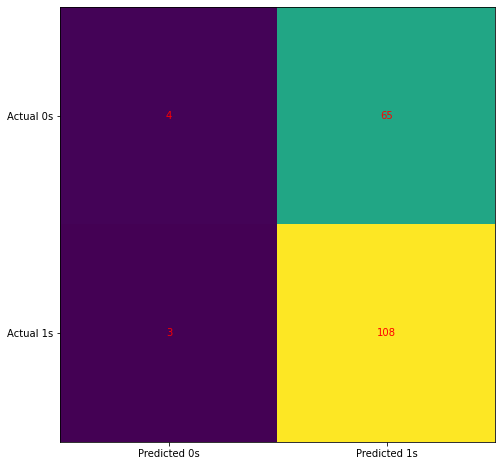

In [147]:
cm = confusion_matrix(y.astype('int'), model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()